# Practice Optimizing Dataframes and Processing in Chunks

In this project, we'll practice working with chunked dataframes and optimizing a dataframe's memory usage. We'll be working with financial lending data from [Lending Club], a marketplace for personal loans that matches borrowers with investors. You can read more about the marketplace on its [website].

The Lending Club's website lists approved loans. Qualified investors can view the borrower's credit score, the purpose of the loan, and other details in the loan applications. Once a lender is ready to back a loan, it selects the amount of money it wants to fund. When the loan amount the borrower requested is fully funded, the borrower receives the money, minus the [origination fee] that Lending Club charges.

We'll be working with a dataset of loans approved from `2007-2011`, which can be downloaded from [Lending Club's website]. The `desc` column has been removed to improve system performance.

If we read in the entire data set, it will consume about 67 megabytes of memory. For learning purposes, let's imagine that we only have 10 megabytes of memory available throughout this project, so we can practice the concepts we learned in the last two missions.

[Lending Club]: https://www.lendingclub.com/
[website]: https://www.lendingclub.com/public/how-peer-lending-works.action
[origination fee]: https://help.lendingclub.com/hc/en-us/articles/214501207-What-is-the-origination-fee-
[Lending Club's website]: https://www.lendingclub.com/info/download-data.action

In [69]:
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt
pd.options.display.max_columns = 99

In [2]:
!ls

loans_2007.csv
project02_practice_optimizing_dataframes_and_processing_in_chunks.ipynb


## Introduction

- Read in the first five lines from `loans_2007.csv` and look for any data quality issues.
- Read in the first 1000 rows from the data set, and calculate the total memory usage for these rows. Increase or decrease the number of rows to converge on a memory usage under `five megabytes` (to stay on the conservative side).

In [3]:
first_five = pd.read_csv('loans_2007.csv', nrows=5)
first_five.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


**Observations**:

- `emp_title` has some missing values
- `emp_length` could be cleaned up into a numeric column instead of a string
- Lots of columns can be converted to categories or boolean types

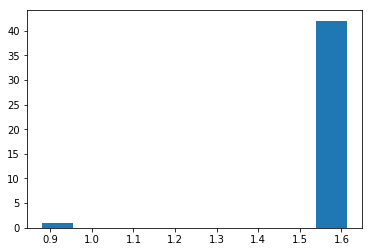

In [4]:
thousand_chunks = pd.read_csv('loans_2007.csv', chunksize=1000)

memory_footprints = []

for chunk in thousand_chunks:
    chunk_memory_mb = chunk.memory_usage(deep=True).sum() / 1048576
    memory_footprints.append(chunk_memory_mb)

plt.hist(memory_footprints)
plt.show()

Chunks of 1000 rows is too small $=>$ Each chunk is no larger than 1.7 MB. Let's increase the chunk size to 3000:

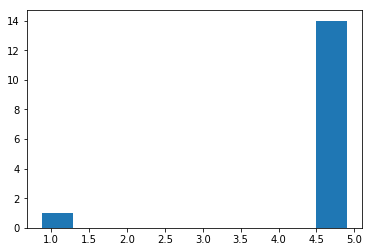

In [5]:
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)

memory_footprints = []

for chunk in chunks:
    chunk_memory_mb = chunk.memory_usage(deep=True).sum() / 1048576
    memory_footprints.append(chunk_memory_mb)

plt.hist(memory_footprints)
plt.show()

Chunks of 3000 rows gets us closer to the 5 MB limit per chunk we set.

---

## Exploring the Data in Chunks

Let's familiarize ourselves with the columns to see which ones we can optimize. Let's try to understand the column types better while using dataframe chunks.

For each chunk:

    - How many columns have a numeric type? How many have a string type?
    - How many unique values are there in each string column? How many of the string columns contain values that are less than 50% unique?
    - Which float columns have no missing values and could be candidates for conversion to the integer type?

Calculate the total memory usage across all of the chunks.

In [53]:

# Are string columns consistent across chunks?
obj_cols = []
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)

for chunk in chunk_iter:
    chunk_obj_cols = chunk.select_dtypes(include=['object']).columns.tolist()
    if len(obj_cols) > 0:
        is_same = obj_cols == chunk_obj_cols
        if not is_same:
            print("overall obj cols:", obj_cols, "\n")
            print("chunk obj cols:", chunk_obj_cols, "\n")    
    else:
        obj_cols = chunk_obj_cols

overall obj cols: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 

chunk obj cols: ['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 

overall obj cols: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'] 



In [59]:
chunks = pd.read_csv('loans_2007.csv', chunksize=3000)

count = 0
total_memory_mb = 0
for chunk in chunks:
    count += 1
    print(f"Chunk {count}:")
    #print(chunk.dtypes)
    
    # chunk memory
    chunk_memory_mb = chunk.memory_usage(deep=True).sum() / 1048576
    print(f"Memory Usage: {chunk_memory_mb:0.2f} MB")
    total_memory_mb += chunk_memory_mb
    
    # get count of type columns
    #int_cols = chunk.select_dtypes(include=['int', 'float'])
    #print(f"There are {len(int_cols.columns)} numeric columns")
    
    print(chunk.dtypes.value_counts())
    
    obj_cols = chunk.select_dtypes(include=['object']).columns.tolist()
    print(f"\n{len(obj_cols)} string type columns: {obj_cols}")
    
    
    # unique values in each string column
    low_unique_columns = []
    for col in obj_cols:
        unique_values_percentage = (len(chunk[col].unique())/chunk.shape[0]) * 100
        if unique_values_percentage < 50:
            low_unique_columns.append(col)
            
        #print(f"\t {col:<20} {unique_values_percentage:0.2f}")
    
    print(f"{len(low_unique_columns)} Columns with low unique"\
          f" value counts: {low_unique_columns}")
    
    float_cols_with_null_check = chunk.select_dtypes(include=['float']).isnull().sum()
    #print(float_cols_with_all_values)
    
    float_cols_no_missing_val = list(float_cols_with_null_check[float_cols_with_null_check == 0].index)
    print(f"\n{len(float_cols_no_missing_val)} Float Columns with "\
          f"no missing values: {float_cols_no_missing_val}")
    print('\n')
    
    #break

print(f"There are {count} chunks! Total memory: {total_memory_mb:0.2f} MB")

Chunk 1:
Memory Usage: 4.65 MB
float64    30
object     21
int64       1
dtype: int64

21 string type columns: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']
20 Columns with low unique value counts: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']

30 Float Columns with no missing values: ['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'ou

Memory Usage: 4.65 MB
float64    30
object     21
int64       1
dtype: int64

21 string type columns: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']
19 Columns with low unique value counts: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']

30 Float Columns with no missing values: ['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'tot


0 Float Columns with no missing values: []


Chunk 15:
Memory Usage: 0.88 MB
float64    30
object     22
dtype: int64

22 string type columns: ['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']
18 Columns with low unique value counts: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']

0 Float Columns with no missing values: []


There are 15 chunks! Total memory: 66.22 MB


**How many unique values are there in each string column?**

In [65]:
## Create dictionary (key: column, value: list of Series objects representing each chunk's value counts)
chunk_iter = pd.read_csv('loans_2007.csv', chunksize=3000)

str_cols_vc = {}

for chunk in chunk_iter:
    str_cols = chunk.select_dtypes(include=['object'])
    for col in str_cols.columns:
        current_col_vc = str_cols[col].value_counts()
        
        if col in str_cols_vc:
            str_cols_vc[col].append(current_col_vc)
        else:
            str_cols_vc[col] = [current_col_vc]

## Combine the value counts.
combined_vcs = {}

for col in str_cols_vc:
    combined_vc = pd.concat(str_cols_vc[col])
    final_vc = combined_vc.groupby(combined_vc.index).sum()
    combined_vcs[col] = final_vc

In [76]:
for key, val in combined_vcs.items():
    print(f"{key:<20} {val.shape[0]}")

term                 2
int_rate             394
grade                7
sub_grade            35
emp_title            30658
emp_length           11
home_ownership       5
verification_status  3
issue_d              55
loan_status          9
pymnt_plan           2
purpose              14
title                21264
zip_code             837
addr_state           50
earliest_cr_line     530
revol_util           1119
initial_list_status  1
last_pymnt_d         103
last_credit_pull_d   108
application_type     1
id                   3538


**Observations**:

- How many columns have a numeric type?
    - There are 30/31 numeric type columns in each chunk
- How many columns have a string type?
    - There are 21/22 string type columns in each chunk. The id column is treated as a string in the last 2 chunks.
- How many of the string columns contain values that are less than 50% unique?
    - 18 - 20 string columns contain values that are less than 50% unique
- Which float columns have no missing values and could be candidates for conversion to the integer type?
    - Lots of float columns have no missing values

---

## Optimizing String Columns

---

## Optimizing Numeric Columns

---

## Next Steps